# Posttest 7

# Link dataset : https://drive.google.com/file/d/1U3auyJq9l9T2HYJfDhZP6_RXFgmXBSeR/view?usp=sharing

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip '/content/drive/My Drive/KB/dataset.zip'

Archive:  /content/drive/My Drive/KB/dataset.zip
  inflating: Car-Bike-Dataset/Bike/Bike (1).jpeg  
  inflating: Car-Bike-Dataset/Bike/Bike (1).jpg  
  inflating: Car-Bike-Dataset/Bike/Bike (1).png  
  inflating: Car-Bike-Dataset/Bike/Bike (10).jpeg  
  inflating: Car-Bike-Dataset/Bike/Bike (10).jpg  
  inflating: Car-Bike-Dataset/Bike/Bike (10).png  
  inflating: Car-Bike-Dataset/Bike/Bike (100).jpeg  
  inflating: Car-Bike-Dataset/Bike/Bike (100).jpg  
  inflating: Car-Bike-Dataset/Bike/Bike (1000).jpeg  
  inflating: Car-Bike-Dataset/Bike/Bike (1001).jpeg  
  inflating: Car-Bike-Dataset/Bike/Bike (1002).jpeg  
  inflating: Car-Bike-Dataset/Bike/Bike (1003).jpeg  
  inflating: Car-Bike-Dataset/Bike/Bike (1004).jpeg  
  inflating: Car-Bike-Dataset/Bike/Bike (1005).jpeg  
  inflating: Car-Bike-Dataset/Bike/Bike (1006).jpeg  
  inflating: Car-Bike-Dataset/Bike/Bike (1007).jpeg  
  inflating: Car-Bike-Dataset/Bike/Bike (1008).jpeg  
  inflating: Car-Bike-Dataset/Bike/Bike (1009).jpeg  
 

# split data

In [11]:

!pip install split-folders

In [12]:
import splitfolders

In [13]:
splitfolders.ratio("Car-Bike-Dataset",
                   output="dataset_final",
                   seed = 1337,
                   ratio=(.8,.1,.1))

Copying files: 4000 files [00:01, 3397.63 files/s]


In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Mengubah bentuk gambar data train dan val

In [15]:
train_datagen = ImageDataGenerator(
    rescale= 1./ 255,
)

val_datagen = ImageDataGenerator(
    rescale = 1./255
)

In [16]:

train_generator  = train_datagen.flow_from_directory(
    '/content/dataset_final/train',
    target_size = (68,68),
    batch_size = 32,
    class_mode = 'binary'
)

val_generator  = val_datagen.flow_from_directory(
    '/content/dataset_final/val',
    target_size = (68,68),
    batch_size = 32,
    class_mode = 'binary'
)

Found 3200 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


## Import library

In [17]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

## Membuat model

In [18]:
model = Sequential([

    Conv2D(16,(3,3), activation = 'relu', input_shape = (68,68,3)),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3), activation = 'relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation = 'relu'),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

## MEMBUAT FITUR CALLBACK DAN MELATIH MODEL

In [19]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [20]:
history = model.fit(train_generator, epochs = 50,
          validation_data = val_generator,
          verbose = 1, callbacks=[early_stopping])

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


100/100 [==============================] - 24s 214ms/step - loss: 0.4242 - accuracy: 0.7822 - val_loss: 0.2607 - val_accuracy: 0.9000
Epoch 2/50
100/100 [==============================] - 23s 227ms/step - loss: 0.2070 - accuracy: 0.9144 - val_loss: 0.2092 - val_accuracy: 0.9175
Epoch 3/50
100/100 [==============================] - 20s 205ms/step - loss: 0.1349 - accuracy: 0.9469 - val_loss: 0.2192 - val_accuracy: 0.9200
Epoch 4/50
100/100 [==============================] - 21s 196ms/step - loss: 0.0893 - accuracy: 0.9678 - val_loss: 0.2332 - val_accuracy: 0.9175
Epoch 5/50
100/100 [==============================] - 23s 227ms/step - loss: 0.0698 - accuracy: 0.9769 - val_loss: 0.3269 - val_accuracy: 0.8950
Epoch 6/50
100/100 [==============================] - 22s 223ms/step - loss: 0.0395 - accuracy: 0.9875 - val_loss: 0.3192 - val_accuracy: 0.9125
Epoch 7/50
100/100 [==============================] - 22s 216ms/step - loss: 0.0111 - accuracy: 0.9978 - val_loss: 0.3717 - val_accuracy: 0.9

In [21]:
test_datagen  = ImageDataGenerator(
    rescale = 1./255
)

test_generator = test_datagen.flow_from_directory(
    '/content/dataset_final/test',
    target_size = (68,68),
    batch_size = 32,
    class_mode = 'binary'
)


Found 400 images belonging to 2 classes.


## EVALUATE HASIL MODEL

In [22]:

model.evaluate(test_generator)

13/13 [==============================] - 1s 103ms/step - loss: 0.2223 - accuracy: 0.9525


[0.22229677438735962, 0.9524999856948853]

## Plot hasil train

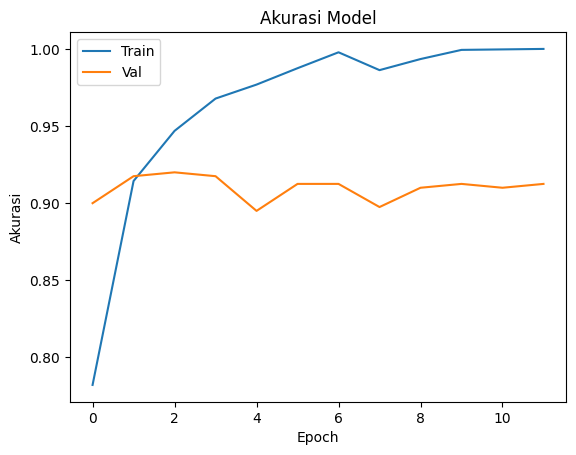

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('Akurasi')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

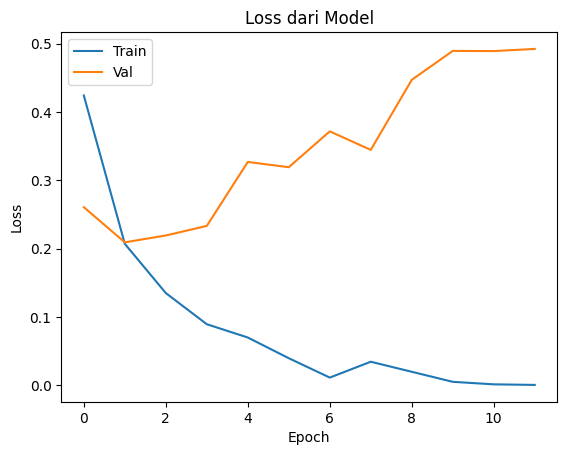

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss dari Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()
